_D. Sierra Porta_

# Análisis de Componentes Principales (PCA)

Tener demasiadas características (features) en un conjunto de datos puede causar problemas como el sobreajuste (overfitting, bueno en datos de entrenamiento, pero malo en nuevos datos), lentitud en los cálculos y menor precisión. A esto se le conoce como la maldición de la dimensionalidad, donde más características aumentan exponencialmente la cantidad de datos necesarios para obtener resultados confiables.

La explosión de combinaciones de características hace que el muestreo sea más difícil en datos de alta dimensionalidad, dificultando y ralentizando tareas como clustering o clasificación.

> Para resolver este problema, utilizamos técnicas de ingeniería de características (feature engineering), tales como selección de características (escoger las más importantes) y extracción de características (crear nuevas características a partir de las originales). Una técnica popular para extraer características es la reducción de dimensionalidad, que reduce el número de características conservando la mayor cantidad posible de información relevante.

Una de las técnicas más ampliamente usadas para reducir la dimensionalidad es el Análisis de Componentes Principales (PCA).

## ¿Cómo funciona PCA para la reducción de dimensionalidad?

El PCA es una técnica estadística introducida por el matemático Karl Pearson en 1901.

PCA transforma datos de alta dimensionalidad en un espacio de menor dimensión, maximizando la varianza (o dispersión) de los datos en este nuevo espacio. Esto ayuda a preservar los patrones y relaciones más importantes en los datos.

> **Nota**: PCA prioriza las direcciones donde los datos varían más, porque más variabilidad implica más información útil.

Para entenderlo fácilmente:

Imagina que observas una nube de datos desordenada (como estrellas en el cielo) y deseas simplificarla. PCA te ayuda a encontrar los ángulos más importantes para observar esta nube sin perder los patrones esenciales.

A continuación, explicaremos cómo funciona PCA paso a paso.

### Paso 1: Estandarizar los datos

Primero, es fundamental que todas las características estén en la misma escala. Por ejemplo, una característica como "salario" (0-100,000) podría dominar sobre "edad" (0-100) si no se estandarizan.

La estandarización asegura que cada variable tenga una media de 0 y una desviación estándar de 1:

$z=\frac{x-\mu}{\sigma}$

donde:
- $\mu$ es la media de cada característica independiente, $\mu={\mu_1,\mu_2,...,\mu_N}$
- $\sigma$ es la desviación estándar de cada característica independiente, $\sigma={\sigma_1,\sigma_2,...,\sigma_N}$

### Paso 2: Encontrar relaciones entre las características

El siguiente paso es calcular cómo se relacionan las características mediante una matriz de covarianza. La covarianza mide cómo varían conjuntamente dos o más variables:

$Cov(x_1,x_2)=\sum_i\frac{(x_{1i}+\bar x_1)(x_{2i}+\bar x_2)}{N-1}$

La covarianza puede ser:
- Positiva: Cuando $x_1$ aumenta, $x_2$ también.
- Negativa: Cuando $x_1$ aumenta, $x_2$ disminuye.
- Cero: Sin relación directa.

### Paso 3: Encontrar las "direcciones mágicas" (Componentes Principales)

- PCA identifica nuevos ejes (como girar una cámara) donde los datos se extienden más:
    - Primer componente principal (PC1): La dirección con máxima varianza.
    - Segundo componente principal (PC2): La siguiente mejor dirección, perpendicular a PC1.
- Estas direcciones se calculan usando autovalores y autovectores.

Para una matriz cuadrada $A$, un autovector $X$ y su correspondiente autovalor $\lambda$ satisfacen:

$AX=\lambda X$

Esto implica que al multiplicar la matriz $A$ por el vector $X$, este solo cambia su magnitud (se estira o encoge), pero no su dirección.

La ecuación característica que determina estos valores es:

$AX-\lambda X=0$, $(A-\lambda I)X=0$

donde $I$ es la matriz identidad y tiene la misma forma de $A$. Las condiciones anteriores serán ciertas si y solo si $(A-\lambda I)$ sea invertible. Esto significa que $det|A-\lambda I|=0$. Este determinante algunas veces es llamado ecuacion caracteristica.

En PCA, la matriz de covarianza actúa como $A$, donde:
- Los autovectores son los componentes principales (PCs).
- Los autovalores representan la varianza capturada por cada PC.

### Paso 4: Elegir las direcciones principales y transformar los datos

- Normalmente, se conservan las 2 o 3 direcciones principales (o las necesarias para capturar aproximadamente el 95% de la varianza).
- Proyectamos los datos en estas nuevas direcciones obteniendo una versión simplificada y de menor dimensión.

PCA es un algoritmo de aprendizaje no supervisado, ya que no requiere conocimiento previo de variables objetivo. Se usa ampliamente en análisis exploratorio y aprendizaje automático para simplificar conjuntos de datos sin perder información crítica.

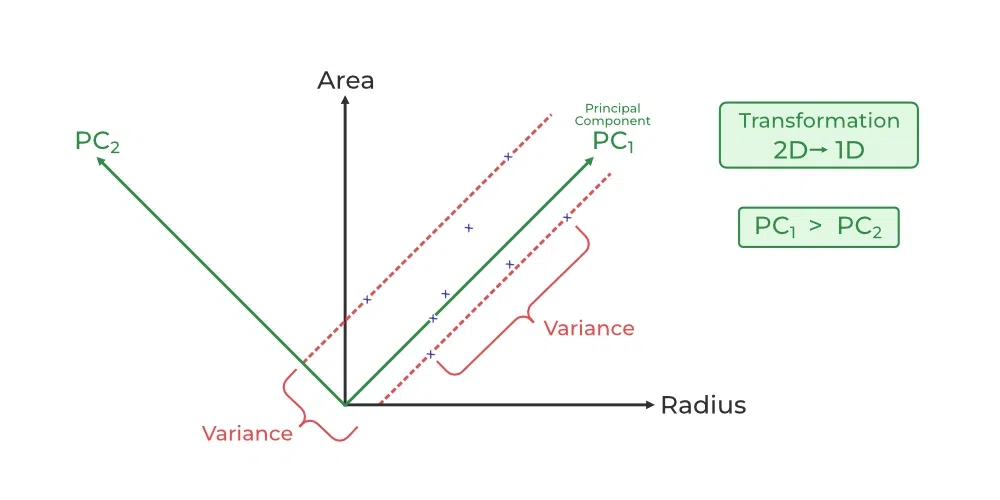

#### Componentes principales (PC):
- PC₁ (Primer componente principal): La dirección a lo largo de la cual los datos tienen la máxima varianza. Capta la información más importante.
- PC₂ (Segundo componente principal): La dirección ortogonal (perpendicular) a PC₁. Capta la varianza restante, pero es menos significativa.

Ahora, las líneas discontinuas rojas indican la dispersión (varianza) de los datos a lo largo de diferentes direcciones. La varianza a lo largo de PC₁ es mayor que PC₂, lo que significa que PC₁ contiene más información útil sobre el conjunto de datos.

> Los puntos de datos (puntos azules) se proyectan en PC₁, lo que reduce el conjunto de datos de dos dimensiones (radio y área) a una (PC₁).
Esta transformación simplifica el conjunto de datos al tiempo que conserva la mayor parte de la variabilidad original.
La imagen explica visualmente por qué PCA selecciona la dirección con mayor varianza (PC₁). Al eliminar PC₂, reducimos la redundancia y conservamos la información esencial. La transformación ayuda a la compresión de datos, la visualización y la mejora del rendimiento del modelo.

## Dataset: Cáncer de mama (Breast Cancer)

Para ilustrar la aplicación práctica del Análisis de Componentes Principales (PCA), usaremos el dataset incorporado en scikit-learn llamado `load_breast_cancer` (https://archive.ics.uci.edu/dataset/14/breast+cancer). Este conjunto de datos contiene información sobre características de muestras de células tumorales, con el objetivo de clasificar tumores como malignos o benignos.

**Descripción del dataset:**

- **Número de muestras:** 569.
- **Número de características:** 30 características numéricas relacionadas con medidas obtenidas de imágenes digitales de masas mamarias.
- **Clases objetivo:** Dos clases (`0`: maligno, `1`: benigno).

Las características incluyen medidas como el radio, textura, perímetro, área, suavidad, compacidad, concavidad, puntos cóncavos, simetría y dimensión fractal, todas derivadas de análisis de imágenes médicas. Este dataset es muy utilizado para tareas de clasificación y análisis exploratorio en ciencia de datos.

## Implementación del análisis de componentes principales en Python
Por lo tanto, PCA emplea una transformación lineal que se basa en preservar la mayor varianza de los datos utilizando el menor número de dimensiones. 

Implica los siguientes pasos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)

Original Dataframe shape : (569, 31)
Inputs Dataframe shape   : (569, 30)


In [2]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Input features
Y = df["target"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [4]:
import seaborn as sns
X0=X[["mean radius","mean texture","mean perimeter","mean area","mean smoothness",
      "mean compactness","mean concavity","mean concave points","mean symmetry","mean fractal dimension"]]
plt.figure(figsize=(12,6))
g = sns.PairGrid(X0)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

NameError: name 'plt' is not defined

Ahora aplicaremos el primer paso que es estandarizar los datos y para ello, primero tendremos que calcular la media y la desviación estándar de cada característica en el espacio de características.

In [ ]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()
print("La desviación estándar de las características es:", X_std)

# Standardization
Z = (X - X_mean) / X_std

In [ ]:
print("La media de las características es:")
X_mean

In [ ]:
print("La desviación estándar de las características es:")
X_std

In [ ]:
print("La matriz estandarizada de las características es:")
Z

La matriz de covarianza nos ayuda a visualizar cómo de fuerte es la dependencia de dos características entre sí en el espacio de características.

In [ ]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

Ahora calcularemos los vectores propios y los valores propios de nuestro espacio de características, que son muy útiles para identificar los componentes principales de nuestro espacio de características.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Ordene los valores propios en orden descendente y, en consecuencia, los vectores propios correspondientes.

In [ ]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

La varianza explicada es el término que nos da una idea de la cantidad de varianza total que se ha conservado al seleccionar los componentes principales en lugar del espacio de características original.

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

**Determinar el número de componentes principales**

Aquí podemos considerar el número de componentes principales de cualquier valor de nuestra elección o limitando la varianza explicada. Aquí estoy considerando una varianza explicada superior al 50%. Vamos a comprobar cuántos componentes principales entran en esto.


In [ ]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

**Proyectar los datos en los componentes principales seleccionados**

En lugar de almacenar las coordenadas (x, y) completas, PCA almacena sólo los valores de proyección a lo largo del componente principal, simplificando el procesamiento de los datos.

> **Matriz de proyección**: es una matriz de vectores propios correspondientes a los mayores valores propios de la matriz de covarianza de los datos. Proyecta el conjunto de datos de alta dimensión en un subespacio de dimensión inferior.

In [ ]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = cancer['feature_names'],
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

A continuación, proyectamos nuestro conjunto de datos mediante la fórmula  

$Proj_{P_i}=\frac{P_i\cdot u}{|u|}=P_i\cdot u_u$	

![](Finding-Projection-in-PCA.webp)

El componente principal u (vector verde) maximiza la varianza de los datos y sirve como nuevo eje para la proyección. El punto de datos P1(x1,y1) (vector rojo) es una observación original, y su proyección sobre u (línea azul) representa su coordenada transformada en la dimensión reducida. Esta proyección simplifica los datos al tiempo que preserva sus características clave.

In [ ]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
Z_pca

Los vectores propios de la matriz de covarianza de los datos se denominan ejes principales de los datos, y la proyección de las instancias de datos sobre estos ejes principales se denomina componentes principales. 

> La reducción de la dimensionalidad se obtiene conservando únicamente los ejes (dimensiones) que explican la mayor parte de la varianza y descartando todos los demás.

## PCA utilizando Sklearn
Existen diferentes bibliotecas en las que todo el proceso del análisis de componentes principales se ha automatizado implementándolo en un paquete como una función y sólo tenemos que pasar el número de componentes principales que nos gustaría tener. Sklearn es una de estas bibliotecas que se puede utilizar para el PCA como se muestra a continuación.

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
df_pca1

Podemos coincidir con el resultado anterior Z_pca de que es exactamente los mismos valores.

In [ ]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=cancer['target'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
# components
pca.components_

## Aparte de lo que hemos comentado, existen muchas más ventajas y limitaciones sutiles del ACP.

### Ventajas y desventajas del análisis de componentes principales
#### Ventajas del análisis de componentes principales

- Tratamiento de la multicolinealidad: Crea nuevas variables no correlacionadas para resolver problemas cuando las características originales están muy correlacionadas.
- **Reducción del ruido**: Elimina los componentes con baja varianza (considerados ruido), lo que mejora la claridad de los datos.
- **Compresión de datos**: Representa los datos con menos componentes, lo que reduce las necesidades de almacenamiento y acelera el procesamiento.
- **Detección de valores atípicos**: Identifica puntos de datos inusuales mostrando cuáles se desvían significativamente en el espacio reducido.

#### Desventajas del análisis de componentes principales

- **Dificultades de interpretación**: Los nuevos componentes son combinaciones de variables originales, que pueden ser difíciles de explicar.
- **Sensibilidad al escalado de datos**: Requiere un escalado adecuado de los datos antes de la aplicación, o los resultados pueden ser engañosos.
- **Pérdida de información**: Al reducir las dimensiones se puede perder parte de la información importante si se mantienen muy pocos componentes.
- **Suposición de linealidad**: Funciona mejor cuando las relaciones entre variables son lineales, y puede tener problemas con datos no lineales.
- **Complejidad computacional**: Puede ser lento y consumir muchos recursos en conjuntos de datos muy grandes.
- **Riesgo de sobreajuste**: El uso de demasiados componentes o el trabajo con un conjunto de datos pequeño puede dar lugar a modelos que no generalicen bien.

### Conclusión
En resumen, el ACP ayuda a destilar datos complejos en sus elementos más informativos, lo que simplifica y hace más eficaz su análisis.
- Identifica las direcciones (denominadas componentes principales) en las que los datos varían más.
- Proyecta los datos en esas direcciones, reduciendo el número de dimensiones y conservando al mismo tiempo toda la información posible.
- El nuevo conjunto de variables no correlacionadas (componentes principales) es más fácil de trabajar y puede utilizarse para tareas como la regresión, la clasificación o la visualización.

### Análisis de componentes principales (ACP) - Preguntas más frecuentes (FAQ)
#### ¿Cuándo debe aplicarse el ACP?

> El uso del PCA es ventajoso cuando se trabaja con conjuntos de datos multicolineales o de alta dimensión. La extracción de características, la reducción del ruido y el preprocesamiento de datos son sus principales usos.

#### ¿Cómo se interpretan los componentes principales?

> Cada componente principal representa nuevos ejes en el espacio de características. Un indicador de la importancia de un componente para captar la variabilidad de los datos es su capacidad para explicar una varianza mayor.

#### ¿Qué importancia tienen los componentes principales?

> Los componentes principales representan las direcciones en las que más varían los datos. Los primeros componentes suelen captar la mayor parte de la varianza de los datos, lo que permite una representación más concisa.